# Star Wars Survey Cleaning and Exploration

In this project we will clean and explore survey done by FiveThirtyEight. The team wanted to answer the question "does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?" The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, and the data can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

There are several columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("StarWarsSurvey.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.drop(index=0, inplace=True, axis=0)

## Cleaning the Data

The columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` represent `Yes/No` questions. The answer can also be `NaN` if the respondent chose not to answer a question. `Yes` and `No` are both string types but it can be a bit easier to analyze by coverting to Boolean with only values `True`, `False`, and `NaN`.

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
yes_no = {
    "Yes": True,
    "No": False
}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()


True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.` For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [9]:
# Converting the columns to Boolean

films = {
    'Star Wars: Episode I  The Phantom Menace': True,
    np.NaN: False,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(films)

In [10]:
# Renaming the columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
})


In [11]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. "1" means the film was the most favorite, and "6" means it was the least favorite. Converting columns 9 up to but not including column 15 to the float data type. First, we will rename the columns to something more intuitive.

In [12]:
# Renaming the columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Finding the Highest-Ranked Movie


In [14]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [15]:
# Importing the matplotlib library for visualizing the data

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Film')

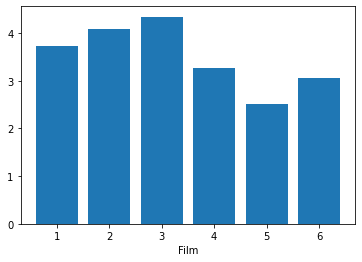

In [16]:
plt.bar(range(1,7), star_wars[star_wars.columns[9:15]].mean())
plt.xlabel('Film')

It seems that the best ranked movies were the first the first trilogy(Star Wars starts at episode 4) with the fifth movie in the franchise(the second one released) being the best ranked.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()` or `mean()`, they treat Booleans like integers. They consider `True` a 1 and `False` a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [17]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Text(0.5, 0, 'Film')

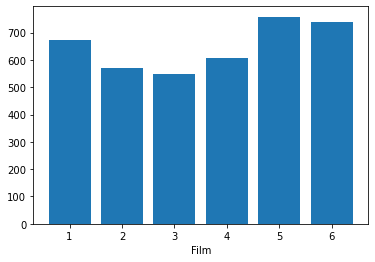

In [19]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())
plt.xlabel('Film')

The older movies(4, 5, and 6) not only are ranked higher but were also more widely viewed which is likely to be the reason the ranking was higher. 

## Male/Female Comparison

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. We can segment the data into groups based on binary columns, specifically observing the `Male`/`Female` differences. Splitting the `Gender` column:

In [20]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

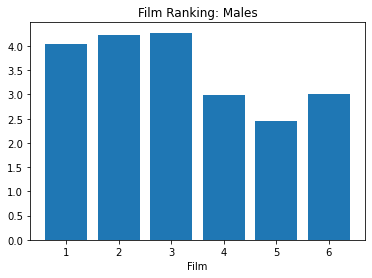

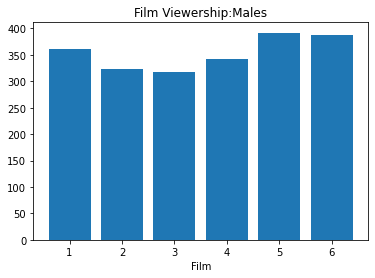

In [22]:
# Finding the film ranking and most viewed films amongst 'Male' participants
plt.bar(range(1,7), males[males.columns[9:15]].mean())
plt.title('Film Ranking: Males')
plt.xlabel('Film')
plt.show()

plt.bar(range(1,7), males[males.columns[3:9]].sum())
plt.title('Film Viewership:Males')
plt.xlabel('Film')
plt.show()

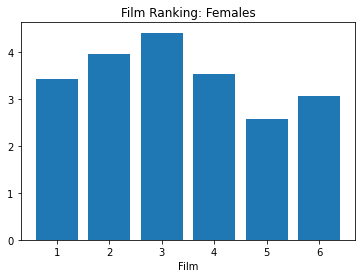

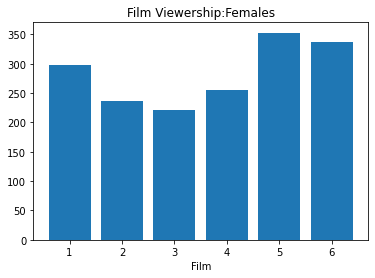

In [23]:
# Finding the film ranking and most viewed films amongst 'Female' participants
plt.bar(range(1,7), females[females.columns[9:15]].mean())
plt.title('Film Ranking: Females')
plt.xlabel('Film')
plt.show()

plt.bar(range(1,7), females[females.columns[3:9]].sum())
plt.title('Film Viewership:Females')
plt.xlabel('Film')
plt.show()

The majority of the `Male` participants have seen all of the movies but still rank the older films much higher than the new trilogy. The `female` participants differ in that many of them have not seen all of the films, the most viewed amongst them were films 5 and 6 then a drop-off to film 1(the new trilogy). Films 5 and 6 and far and away the highest ranked films amongst the `females` but films 4 and 1 and almost even in the rankings.

In other words, the `Male` respondents seem to be more polarized with their love for the "original" trilogy than the females. 